# Bibliotecas

In [636]:
# ! pip install xgboost

In [637]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,
                                     cross_val_score)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [638]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [639]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [640]:
df['species'] = df['species'].map({'setosa': 0,
                                   'versicolor': 1,
                                   'virginica': 2})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


É um problema de classificação, pois a variável *target* é discreta e contém 3 classes

* setosa
* versicolor
* virginica

In [641]:
X = df.drop(['species'],  axis=1)

y = df['species']

## Split treino e teste

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Modelos classificadores

In [643]:
classificador_xgboost = xgb.XGBClassifier()

# Cross validation apenas para comparação entre modelos

resultado_cv_acc_xgb = cross_val_score(classificador_xgboost, X_train, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_xgb.mean())))

resultado_cv_rsquared_xgb = cross_val_score(classificador_xgboost, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_xgb.mean())))

resultado_cv_nmae_xgb = cross_val_score(classificador_xgboost, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_xgb.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


## Tunando o classificador

In [644]:
classificador_xgboost_depth = xgb.XGBClassifier(max_depth=2) # Altera a altura máxima das árvores

resultado_cv_acc_depth = cross_val_score(classificador_xgboost_depth, X_train, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_depth.mean())))

resultado_cv_rsquared_depth = cross_val_score(classificador_xgboost_depth, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_depth.mean())))

resultado_cv_nmae_depth = cross_val_score(classificador_xgboost_depth, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_depth.mean())))

Accuracy: 0.94
R^2: 0.92
Negative MAE: 0.06


In [645]:
classificador_xgboost_dart = xgb.XGBClassifier(booster='dart')

resultado_cv_acc_dart = cross_val_score(classificador_xgboost_dart, X_train, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_dart.mean())))

resultado_cv_rsquared_dart = cross_val_score(classificador_xgboost_dart, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_dart.mean())))

resultado_cv_nmae_dart = cross_val_score(classificador_xgboost_dart, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_dart.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


In [646]:
classificador_xgboost_gblinear = xgb.XGBClassifier(booster='gblinear')

resultado_cv_acc_gbl = cross_val_score(classificador_xgboost_gblinear, X_train, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_gbl.mean())))

resultado_cv_rsquared_gbl = cross_val_score(classificador_xgboost_gblinear, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_gbl.mean())))

resultado_cv_nmae_gbl = cross_val_score(classificador_xgboost_gblinear, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_gbl.mean())))

Accuracy: 0.70
R^2: 0.56
Negative MAE: 0.30


In [647]:
classificador_xgboost_gbtree = xgb.XGBClassifier(booster='gbtree')

resultado_cv_acc_gbt = cross_val_score(classificador_xgboost_gbtree, X_train, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_gbt.mean())))

resultado_cv_rsquared_gbt = cross_val_score(classificador_xgboost_gbtree, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_gbt.mean())))

resultado_cv_nmae_gbt = cross_val_score(classificador_xgboost_gbtree, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_gbt.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


# Normalização dos dados

In [648]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Principal Component Analysis (PCA)

In [649]:
pca = PCA(n_components=4)

X_scaled_pca = pca.fit_transform(X_scaled)

pca.components_ # Em cada linha é dado os coeficientes de uma componente principal (n_components)
# Coeficientes da combinação das variáveis originais que dão origem às componentes principais

array([[ 0.42494212, -0.15074824,  0.61626702,  0.64568888],
       [ 0.42320271,  0.90396711, -0.06038308, -0.00983925],
       [-0.71357236,  0.33631602, -0.0659003 ,  0.61103451],
       [-0.36213001,  0.21681781,  0.78244872, -0.45784921]])

In [650]:
pca.explained_variance_ratio_.round(3)

array([0.841, 0.118, 0.035, 0.006])

* A primeira componente principal explica 84,1% da variabilidade dos dados
* A segunda componente principal explica 11,8% da variabilidade dos dados

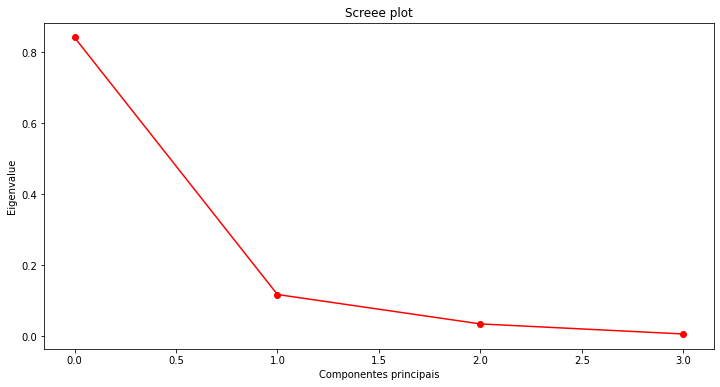

In [651]:
fig = plt.figure(figsize=(12, 6))

plt.plot(pca.explained_variance_ratio_, 'ro-')
plt.title('Screee plot')
plt.xlabel('Componentes principais')
plt.ylabel('Eigenvalue')

plt.show()

In [652]:
pca = PCA(n_components=2)

X_scaled_pca_two_comp = pca.fit_transform(X_scaled)

pca_componentes = pca.components_.round(3)

pca_componentes

array([[ 0.425, -0.151,  0.616,  0.646],
       [ 0.423,  0.904, -0.06 , -0.01 ]])

In [653]:
index = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

columns = ('cp1', 'cp2')

data = pca_componentes.transpose()

df_componentes = pd.DataFrame(data=data, index=index, columns=columns)

df_componentes

,cp1,cp2
sepal_length,0.425,0.423
sepal_width,-0.151,0.904
petal_length,0.616,-0.060
petal_width,0.646,-0.010


In [654]:
cp1 = pca.transform(X)[:, 0]

cp2 = pca.transform(X)[:, 1]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [655]:
df_scaled = pd.DataFrame(data=X_scaled_pca_two_comp, columns=['cp1', 'cp2'])

df_scaled

,cp1,cp2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488
...,...,...
145,0.551462,0.059841
146,0.407146,-0.171821
147,0.447143,0.037560
148,0.488208,0.149678


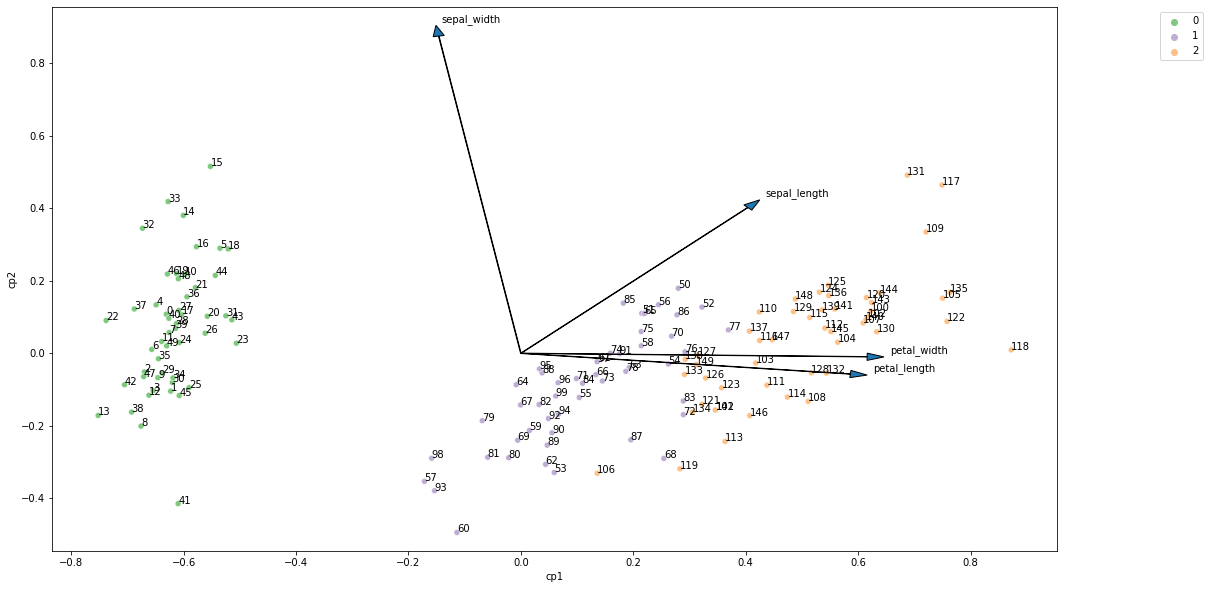

In [677]:
ax = sns.scatterplot(data=df_scaled, x='cp1', y='cp2', hue=df['species'], palette='Accent')

ax.figure.set_size_inches(18, 10)

ax.legend(bbox_to_anchor=(1.15, 1))

ax.set_ylim(None, df_componentes['cp2'].max() + 0.05)

for k, v in df_scaled.iterrows():
    ax.annotate(k, v)


for i in range(0, len(df_componentes)):
    plt.arrow(0, 0, df_componentes.iloc[i][0], df_componentes.iloc[i][1], head_width = 0.02, length_includes_head=True)

    ax.annotate(df_componentes.index[i], xy=(df_componentes.iloc[i][0] + 0.01, df_componentes.iloc[i][1] + 0.01))

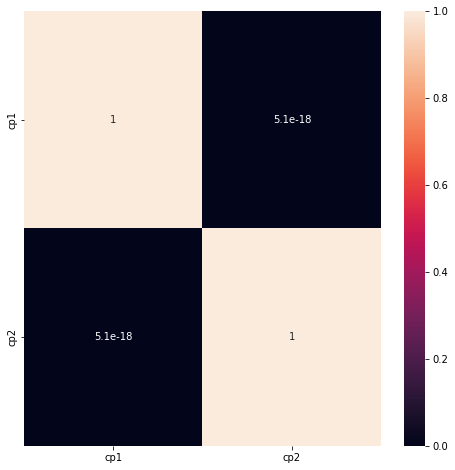

In [663]:
ax = sns.heatmap(df_scaled.corr(), annot=True)

ax.figure.set_size_inches(8, 8)

# Split treino e teste

In [664]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_scaled_pca_two_comp, y, random_state=0, test_size=0.3)

# Modelos classificadores

In [665]:
classificador_xgboost_pca = xgb.XGBClassifier()

# Cross validation para comparação entre modelos

resultado_cv_acc_xgb_pca = cross_val_score(classificador_xgboost_pca, X_train_new, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_xgb_pca.mean())))

resultado_cv_rsquared_xgb_pca = cross_val_score(classificador_xgboost_pca, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_xgb_pca.mean())))

resultado_cv_nmae_xgb_pca = cross_val_score(classificador_xgboost_pca, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_xgb_pca.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


## Tunando o classificador

In [666]:
classificador_xgboost_depth_pca = xgb.XGBClassifier(max_depth=2) # Altera a altura máxima das árvores

resultado_cv_acc_depth_pca = cross_val_score(classificador_xgboost_depth_pca, X_train_new, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_depth_pca.mean())))

resultado_cv_rsquared_depth_pca = cross_val_score(classificador_xgboost_depth_pca, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_depth_pca.mean())))

resultado_cv_nmae_depth_pca = cross_val_score(classificador_xgboost_depth_pca, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_depth_pca.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


In [667]:
classificador_xgboost_dart_pca = xgb.XGBClassifier(booster='dart')

resultado_cv_acc_dart_pca = cross_val_score(classificador_xgboost_dart_pca, X_train_new, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_dart_pca.mean())))

resultado_cv_rsquared_dart_pca = cross_val_score(classificador_xgboost_dart_pca, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_dart_pca.mean())))

resultado_cv_nmae_dart_pca = cross_val_score(classificador_xgboost_dart_pca, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_dart_pca.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


In [668]:
classificador_xgboost_gblinear_pca = xgb.XGBClassifier(booster='gblinear')

resultado_cv_acc_gbl_pca = cross_val_score(classificador_xgboost_gblinear_pca, X_train_new, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_gbl_pca.mean())))

resultado_cv_rsquared_gbl_pca = cross_val_score(classificador_xgboost_gblinear_pca, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_gbl_pca.mean())))

resultado_cv_nmae_gbl_pca = cross_val_score(classificador_xgboost_gblinear_pca, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_gbl_pca.mean())))

Accuracy: 0.70
R^2: 0.56
Negative MAE: 0.30


In [669]:
classificador_xgboost_gbtree_pca = xgb.XGBClassifier(booster='gbtree')

resultado_cv_acc_gbt_pca = cross_val_score(classificador_xgboost_gbtree_pca, X_train_new, y_train, scoring='accuracy')

print('Accuracy: {:.2f}'.format(abs(resultado_cv_acc_gbt_pca.mean())))

resultado_cv_rsquared_gbt_pca = cross_val_score(classificador_xgboost_gbtree_pca, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv_rsquared_gbt_pca.mean())))

resultado_cv_nmae_gbt_pca = cross_val_score(classificador_xgboost_gbtree_pca, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv_nmae_gbt_pca.mean())))

Accuracy: 0.95
R^2: 0.93
Negative MAE: 0.05


# Análise dos resultados

In [670]:
data = ((abs(resultado_cv_acc_xgb.mean()).round(3),
        abs(resultado_cv_rsquared_xgb.mean()).round(3),
        abs(resultado_cv_nmae_xgb.mean()).round(3)),
        (abs(resultado_cv_acc_depth.mean()).round(3),
        abs(resultado_cv_rsquared_depth.mean()).round(3),
        abs(resultado_cv_nmae_depth.mean()).round(3)),
        (abs(resultado_cv_acc_dart.mean()).round(3),
        abs(resultado_cv_rsquared_dart.mean()).round(3),
        abs(resultado_cv_nmae_dart.mean()).round(3)),
        (abs(resultado_cv_acc_gbl.mean()).round(3),
        abs(resultado_cv_rsquared_gbl.mean()).round(3),
        abs(resultado_cv_nmae_gbl.mean()).round(3)),
        (abs(resultado_cv_acc_gbt.mean()).round(3),
        abs(resultado_cv_rsquared_gbt.mean()).round(3),
        abs(resultado_cv_nmae_gbt.mean()).round(3)),
        (abs(resultado_cv_acc_xgb_pca.mean()).round(3),
        abs(resultado_cv_rsquared_xgb_pca.mean()).round(3),
        abs(resultado_cv_nmae_xgb_pca.mean()).round(3)),
        (abs(resultado_cv_acc_depth_pca.mean()).round(3),
        abs(resultado_cv_rsquared_depth_pca.mean()).round(3),
        abs(resultado_cv_nmae_depth_pca.mean()).round(3)),
        (abs(resultado_cv_acc_dart_pca.mean()).round(3),
        abs(resultado_cv_rsquared_dart_pca.mean()).round(3),
        abs(resultado_cv_nmae_dart_pca.mean()).round(3)),
        (abs(resultado_cv_acc_gbl_pca.mean()).round(3),
        abs(resultado_cv_rsquared_gbl_pca.mean()).round(3),
        abs(resultado_cv_nmae_gbl_pca.mean()).round(3)),
        (abs(resultado_cv_acc_gbt_pca.mean()).round(3),
        abs(resultado_cv_rsquared_gbt_pca.mean()).round(3),
        abs(resultado_cv_nmae_gbt_pca.mean()).round(3))
        )


columns = ('accuracy',
           'r^2',
           'negative_mae')


index = ('classificador_xgboost',
         'classificador_xgboost_depth',
         'classificador_xgboost_dart',
         'classificador_xgboost_gblinear',
         'classificador_xgboost_gbtree',
         'classificador_xgboost_pca',
         'classificador_xgboost_depth_pca',
         'classificador_xgboost_dart_pca',
         'classificador_xgboost_gblinear_pca',
         'classificador_xgboost_gbtree_pca')



df_results = pd.DataFrame(data=data, columns=columns, index=index)

In [671]:
df_results.sort_values(['accuracy', 'negative_mae'], ascending=False)

,accuracy,r^2,negative_mae
classificador_xgboost,0.952,0.931,0.048
classificador_xgboost_dart,0.952,0.931,0.048
classificador_xgboost_gbtree,0.952,0.931,0.048
classificador_xgboost_pca,0.952,0.930,0.048
classificador_xgboost_depth_pca,0.952,0.930,0.048
classificador_xgboost_dart_pca,0.952,0.930,0.048
classificador_xgboost_gbtree_pca,0.952,0.930,0.048
classificador_xgboost_depth,0.943,0.916,0.057
classificador_xgboost_gblinear,0.695,0.558,0.305
classificador_xgboost_gblinear_pca,0.695,0.558,0.305


# Aplicação do melhor modelo

In [672]:
melhor_modelo = classificador_xgboost_gbtree

melhor_modelo.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

# Predição de espécies

In [673]:
pred = melhor_modelo.predict(X_test)

Total de acertos

In [674]:
acertos = (pred == y_test).sum()

acertos

44

In [675]:
tamanho_teste = len(y_test)

tamanho_teste

45

In [676]:
acuracia = (acertos / tamanho_teste) * 100

print('Acurácia de {:.2f}%'.format(acuracia))

Acurácia de 97.78%
